In [1]:
import pandas as pd
import numpy as np
from numpy import cov
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from scipy.stats import t
import datetime

In [2]:
TraffData = pd.read_csv("cleaned_traffic_data.csv",sep=',',parse_dates=['Date'])
TraffData['Date'] = TraffData['Date'].dt.strftime('%m/%d/%Y')
TraffData

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,09/09/2019,1,47,4.50,2.566,2.430
1,06/17/2019,1,50,7.60,4.266,3.840
2,06/17/2019,1,50,7.60,3.934,3.545
3,06/17/2019,1,50,7.60,2.924,2.640
4,09/09/2019,1,50,7.60,6.164,5.520
...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,241.000,220.000
582,06/27/2019,374,30,11.04,488.000,440.000
583,06/04/2019,376,10,5.68,1.409,1.320
584,05/28/2019,376,20,5.96,2.215,2.080


In [3]:
AllCOData = pd.read_csv("Nova_Scotia_Provincial_Ambient_Carbon_Monoxide__CO__Hourly_Data_Halifax_Johnston.csv", sep =',')
AllCOData.head()

,Date & Time,Pollutant,Unit,Station,Average
0,01/01/2019 12:00:00 AM,CO,ppm,Halifax Johnston,0.25
1,01/01/2019 01:00:00 AM,CO,ppm,Halifax Johnston,0.26
2,01/01/2019 02:00:00 AM,CO,ppm,Halifax Johnston,0.20
3,01/01/2019 03:00:00 AM,CO,ppm,Halifax Johnston,0.17
4,01/01/2019 04:00:00 AM,CO,ppm,Halifax Johnston,0.15


In [4]:
COData = AllCOData[['Date & Time','Average']]
COData.rename(columns=({'Date & Time':'Date'}),inplace=True,)
COData[['Date','Time','AP']] =  COData.Date.str.split(" ", expand = True)
COData = COData[['Date','Average']] 
COData = COData[COData['Date'].str.contains('[\d/]2019')]
COData = COData.groupby('Date').mean()
COData

C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Average
Date,
01/01/2019,0.146250
01/02/2019,0.152917
01/03/2019,0.198333
01/04/2019,0.178333
01/05/2019,0.197083
...,...
12/27/2019,0.127083
12/28/2019,0.116250
12/29/2019,0.106667


In [5]:
MergedData = pd.merge(TraffData,COData,on='Date',how='left')
MergedData


,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,4.50,2.566,2.430,0.122174
1,06/17/2019,1,50,7.60,4.266,3.840,0.144167
2,06/17/2019,1,50,7.60,3.934,3.545,0.144167
3,06/17/2019,1,50,7.60,2.924,2.640,0.144167
4,09/09/2019,1,50,7.60,6.164,5.520,0.122174
...,...,...,...,...,...,...,...
581,06/27/2019,374,28,6.83,241.000,220.000,0.073913
582,06/27/2019,374,30,11.04,488.000,440.000,0.073913
583,06/04/2019,376,10,5.68,1.409,1.320,0.122083
584,05/28/2019,376,20,5.96,2.215,2.080,0.097391


In [6]:
cols_to_norm = ['Average','ADT','AADT','SECTION LENGTH']
print(cols_to_norm)
MergedData[cols_to_norm] = MergedData[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
MergedData

['Average', 'ADT', 'AADT', 'SECTION LENGTH']


,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,0.209552,0.001571,0.001446,0.542614
1,06/17/2019,1,50,0.360624,0.003282,0.002872,0.698085
2,06/17/2019,1,50,0.360624,0.002948,0.002573,0.698085
3,06/17/2019,1,50,0.360624,0.001932,0.001658,0.698085
4,09/09/2019,1,50,0.360624,0.005191,0.004570,0.542614
...,...,...,...,...,...,...,...
581,06/27/2019,374,28,0.323099,0.241446,0.221436,0.201447
582,06/27/2019,374,30,0.528265,0.489938,0.443883,0.201447
583,06/04/2019,376,10,0.267057,0.000407,0.000324,0.541973
584,05/28/2019,376,20,0.280702,0.001218,0.001092,0.367420


**Below shows Normal-Distribution of column Average after normalization**

<AxesSubplot:ylabel='Density'>

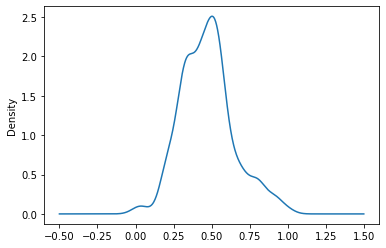

In [7]:
MergedData['Average'].plot.kde()

**ADT and Average on compare is non-linear**

<AxesSubplot:xlabel='ADT', ylabel='Average'>

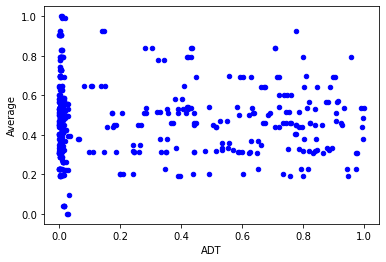

In [8]:
MergedData.plot.scatter(x='ADT',
                        y='Average'
                        ,c='Blue')

**AADT and Average on compare is non-linear**

<AxesSubplot:xlabel='AADT', ylabel='Average'>

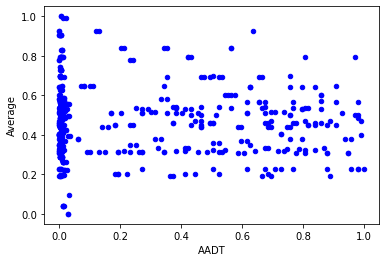

In [9]:
MergedData.plot.scatter(x='AADT',
                        y='Average'
                        ,c='Blue')

**Section Length and Average on comapre are much better than other features**

<AxesSubplot:xlabel='SECTION LENGTH', ylabel='Average'>

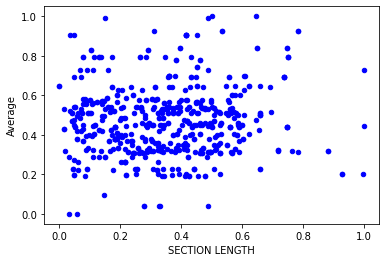

In [10]:
MergedData.plot.scatter(x='SECTION LENGTH',
                        y='Average'
                        ,c='Blue')

<AxesSubplot:xlabel='HIGHWAY', ylabel='Average'>

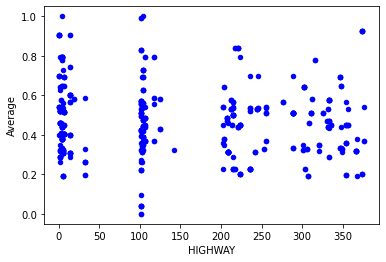

In [11]:
MergedData.plot.scatter(x='HIGHWAY',
                        y='Average'
                        ,c='Blue')

<AxesSubplot:xlabel='ADT', ylabel='Average'>

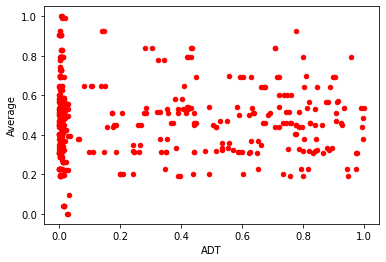

In [12]:
MergedData.plot.scatter(x='ADT',
                        y='Average'
                        ,c='Red')

**ADT and AADT on compare is linear, so we will consider only ADT into feature and will remove AADT as both are linear and taking both will not improve our model**

<AxesSubplot:xlabel='ADT', ylabel='AADT'>

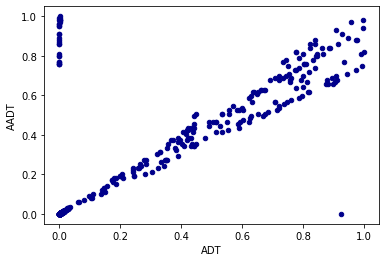

In [13]:
MergedData.plot.scatter(x='ADT',
                y='AADT',
                c='DarkBlue')

**Below shows Summary Visualization of Data**

In [14]:
MergedData.drop(['AADT','Date'],axis=1,inplace=False).describe(include = 'all')

,HIGHWAY,SECTION,SECTION LENGTH,ADT,Average
count,586.000000,586.000000,586.000000,586.000000,586.000000
mean,148.576792,52.779863,0.350969,0.197231,0.471287
std,125.552938,56.718809,0.194030,0.306120,0.174435
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,17.000000,0.192495,0.001846,0.335788
50%,104.000000,30.000000,0.343738,0.007201,0.462445
75%,245.000000,60.000000,0.479532,0.382794,0.559647
max,376.000000,270.000000,1.000000,1.000000,1.000000


**Reason for removing colums from our Final Data**

Date & Time- removed because our model cannot understand date and time values.<br>
Pollutant- removed because in data it is unique as shown below.<br>
Unit- removed because in data it is unique as shown below.<br>

In [15]:
AllCOData.describe(include='all')

,Date & Time,Pollutant,Unit,Station,Average
count,236687,236687,236687,236687,205269.000000
unique,236687,1,1,2,NaN
top,01/01/2019 12:00:00 AM,CO,ppm,Halifax,NaN
freq,1,236687,236687,210384,NaN
mean,NaN,NaN,NaN,NaN,0.358628
std,NaN,NaN,NaN,NaN,0.322583
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.130000
50%,NaN,NaN,NaN,NaN,0.270000
75%,NaN,NaN,NaN,NaN,0.500000


**We removed station from final data because for year 2019 its unique as shown below**

In [16]:
AllCOData[(AllCOData["Date & Time"]>='01/01/2019 12:00:00 AM' )& (AllCOData["Date & Time"]<'01/01/2020 12:00:00 AM')]['Station'].nunique()

1

**Doing PCA to reduce dimensions to find which features might fit a strait line best like if our hypothesis can divide dataset ito two halves**

In [17]:
A = MergedData['HIGHWAY']
B = MergedData['SECTION']
C = MergedData['SECTION LENGTH']
D = MergedData['ADT']
E = MergedData['AADT'] 
F = MergedData['Average']

In [18]:
data = np.array([A,B,C,D,E,F])

In [19]:
scaler = StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(data)

In [21]:
covMatrix = np.cov(scaled_data)
covMatrix

array([[ 1.11997266e+00, -1.12222851e+00,  6.86251615e-05,
         2.61277826e-03,  3.25733744e-03, -3.68289482e-03],
       [-1.12222851e+00,  1.21911336e+00, -2.42707901e-02,
        -2.69365950e-02, -2.67250679e-02, -1.89523933e-02],
       [ 6.86251615e-05, -2.42707901e-02,  6.47813361e-03,
         5.98505460e-03,  5.79902082e-03,  5.93995590e-03],
       [ 2.61277826e-03, -2.69365950e-02,  5.98505460e-03,
         6.68165492e-03,  6.13918359e-03,  5.51792363e-03],
       [ 3.25733744e-03, -2.67250679e-02,  5.79902082e-03,
         6.13918359e-03,  6.26397198e-03,  5.26555408e-03],
       [-3.68289482e-03, -1.89523933e-02,  5.93995590e-03,
         5.51792363e-03,  5.26555408e-03,  5.91185454e-03]])

In [22]:
eigen_values, eigen_vector = np.linalg.eig(covMatrix)

In [23]:
print(" Eigen Vector \n:", eigen_vector,"\n")
print(" Eigen Values \n:", eigen_values,"\n")

 Eigen Vector 
: [[ 6.91072213e-01 -5.96403293e-01 -6.58452498e-04  4.08248290e-01
  -6.87460198e-03  2.81910577e-03]
 [-7.22604455e-01 -5.57741050e-01 -5.20835482e-03  4.08248290e-01
  -8.35432365e-03  2.03330436e-03]
 [ 7.75080320e-03  2.95459386e-01  3.82518521e-01  4.08248290e-01
  -7.39861897e-01 -2.28606570e-01]
 [ 9.35900838e-03  2.95590540e-01 -4.78524645e-01  4.08248290e-01
  -1.22872189e-01  7.08370358e-01]
 [ 9.48371280e-03  2.84737433e-01 -5.05605149e-01  4.08248290e-01
   2.77767024e-01 -6.47593159e-01]
 [ 4.93871686e-03  2.78356984e-01  6.07478081e-01  4.08248290e-01
   6.00195988e-01  1.62976961e-01]] 

 Eigen Values 
: [2.29346075e+00 6.93281921e-02 1.08949987e-03 1.45384735e-16
 2.02892280e-04 3.40302237e-04] 



In [24]:
varaiance_explained = []
for j in eigen_values:
    varaiance_explained.append((j/sum(eigen_values))*100)
    
print(varaiance_explained)

[96.99880573541189, 2.932141674303186, 0.046078916361717, 6.1488498048344344e-15, 0.008581053256413732, 0.01439262066677324]


In [25]:
cum_variance = np.cumsum(varaiance_explained)
print(cum_variance)

[ 96.99880574  99.93094741  99.97702633  99.97702633  99.98560738
 100.        ]


<AxesSubplot:>

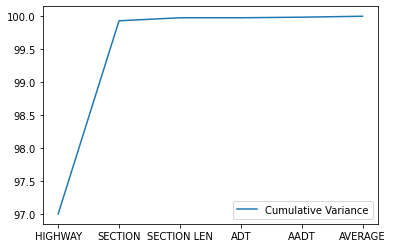

In [26]:
plot_data = pd.DataFrame({
    'Cumulative Variance':cum_variance
}, index = ['HIGHWAY','SECTION','SECTION LEN','ADT','AADT','AVERAGE'])
plot_data.plot.line()

In [27]:
proj_matrix = (eigen_vector.T[:][:1]).T
print(proj_matrix)

[[ 0.69107221]
 [-0.72260445]
 [ 0.0077508 ]
 [ 0.00935901]
 [ 0.00948371]
 [ 0.00493872]]


In [125]:
MergedData_PCA = MergedData.iloc[:,1:7].values.dot(proj_matrix)

In [29]:
Merged_Data_PCA_DF = pd.DataFrame(data = MergedData_PCA, columns=["HIGHWAY"])

In [30]:
Merged_Data_PCA_DF

,HIGHWAY
0,-33.267005
1,-35.432850
2,-35.432856
3,-35.432874
4,-35.433584
...,...
581,238.235942
582,236.796759
583,252.621861
584,245.395075


In [31]:
temp = [MergedData["Date"],Merged_Data_PCA_DF["HIGHWAY"],MergedData["Average"]]
headers = ["Date","HIGHWAY","Average"]
Final_DataFrame = pd.concat(temp, axis=1,keys=headers)
Final_DataFrame

,Date,HIGHWAY,Average
0,09/09/2019,-33.267005,0.542614
1,06/17/2019,-35.432850,0.698085
2,06/17/2019,-35.432856,0.698085
3,06/17/2019,-35.432874,0.698085
4,09/09/2019,-35.433584,0.542614
...,...,...,...
581,06/27/2019,238.235942,0.201447
582,06/27/2019,236.796759,0.201447
583,06/04/2019,252.621861,0.541973
584,05/28/2019,245.395075,0.367420


In [32]:
split_date = datetime.datetime(2019,7,31)
split_date = pd.to_datetime(split_date)

In [33]:
Final_DataFrame["Date"] = pd.to_datetime(Final_DataFrame["Date"])
Final_DataFrame.dtypes

Date       datetime64[ns]
HIGHWAY           float64
Average           float64
dtype: object

In [34]:
Train =  Final_DataFrame[(pd.to_datetime(Final_DataFrame["Date"]) < split_date)]
Train

,Date,HIGHWAY,Average
1,2019-06-17,-35.432850,0.698085
2,2019-06-17,-35.432856,0.698085
3,2019-06-17,-35.432874,0.698085
5,2019-06-17,-35.432873,0.698085
18,2019-07-10,-34.742839,0.285714
...,...,...,...
581,2019-06-27,238.235942,0.201447
582,2019-06-27,236.796759,0.201447
583,2019-06-04,252.621861,0.541973
584,2019-05-28,245.395075,0.367420


In [35]:
Test = Final_DataFrame[(pd.to_datetime(Final_DataFrame["Date"]) > split_date)] 
Test

,Date,HIGHWAY,Average
0,2019-09-09,-33.267005,0.542614
4,2019-09-09,-35.433584,0.542614
6,2019-09-16,-42.661506,0.397644
7,2019-09-09,-46.271913,0.542614
8,2019-09-09,-49.887195,0.542614
...,...,...,...
556,2019-09-18,238.872792,0.356406
557,2019-10-03,237.422936,0.450663
558,2019-10-03,237.422765,0.450663
559,2019-10-03,233.804993,0.450663


In [36]:
X_Train = Train[["HIGHWAY"]]
Y_Train = Train[["Average"]]
X_Test = Test[["HIGHWAY"]]
Y_Test = Test[["Average"]]

In [37]:
model = linear_model.LinearRegression()

In [38]:
model.fit(X_Train,Y_Train)

LinearRegression()

In [39]:
y_trainpred = model.predict(X_Train)

In [40]:
y_prediction = model.predict(X_Test)

In [41]:
scoretrain = r2_score(Y_Train,y_trainpred)
scoretrain

0.0008074024040841676

In [42]:
score = r2_score(Y_Test,y_prediction)
score

-0.008672021779141836

In [43]:
mean_squared_error(Y_Test,y_prediction)

0.04742863137520921

**Trying linear regression after Dummininsing the HIGHWAY and SECTION as it is a categorical data
 <br> It converts categorical data into dummy or indicator variables**

In [44]:
MergedData['HIGHWAY'] = MergedData['HIGHWAY'].astype('category')
MergedData['SECTION'] = MergedData['SECTION'].astype('category')

In [45]:
MergedData.dtypes

Date                object
HIGHWAY           category
SECTION           category
SECTION LENGTH     float64
ADT                float64
AADT               float64
Average            float64
dtype: object

In [46]:
testvar = ['HIGHWAY','SECTION']
MergedData_Dummies =  pd.get_dummies(MergedData,columns=testvar)

In [47]:
MergedData_Dummies

,Date,SECTION LENGTH,ADT,AADT,Average,HIGHWAY_1,HIGHWAY_2,HIGHWAY_3,HIGHWAY_4,HIGHWAY_6,...,SECTION_210,SECTION_220,SECTION_223,SECTION_227,SECTION_230,SECTION_240,SECTION_250,SECTION_252,SECTION_255,SECTION_270
0,09/09/2019,0.209552,0.001571,0.001446,0.542614,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,06/17/2019,0.360624,0.003282,0.002872,0.698085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,06/17/2019,0.360624,0.002948,0.002573,0.698085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06/17/2019,0.360624,0.001932,0.001658,0.698085,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,09/09/2019,0.360624,0.005191,0.004570,0.542614,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,06/27/2019,0.323099,0.241446,0.221436,0.201447,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,06/27/2019,0.528265,0.489938,0.443883,0.201447,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
583,06/04/2019,0.267057,0.000407,0.000324,0.541973,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584,05/28/2019,0.280702,0.001218,0.001092,0.367420,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
MergedDataNew = MergedData.copy()
MergedData_NoDate = MergedData.drop('Date',axis=1, inplace=False)

In [49]:
MergedData_NoDate

,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,1,47,0.209552,0.001571,0.001446,0.542614
1,1,50,0.360624,0.003282,0.002872,0.698085
2,1,50,0.360624,0.002948,0.002573,0.698085
3,1,50,0.360624,0.001932,0.001658,0.698085
4,1,50,0.360624,0.005191,0.004570,0.542614
...,...,...,...,...,...,...
581,374,28,0.323099,0.241446,0.221436,0.201447
582,374,30,0.528265,0.489938,0.443883,0.201447
583,376,10,0.267057,0.000407,0.000324,0.541973
584,376,20,0.280702,0.001218,0.001092,0.367420


In [50]:
MergedData_NoDate.corr()

,SECTION LENGTH,ADT,AADT,Average
SECTION LENGTH,1.000000,0.280939,0.285422,0.077435
ADT,0.280939,1.000000,0.780457,-0.008396
AADT,0.285422,0.780457,1.000000,-0.049260
Average,0.077435,-0.008396,-0.049260,1.000000


In [51]:
split_date = datetime.datetime(2019,7,31)
split_date = pd.to_datetime(split_date)

In [52]:
scaler = StandardScaler()
temp_col = ['SECTION LENGTH','ADT','AADT'];
scaler.fit(MergedData_Dummies[temp_col])
MergedData_Dummies[temp_col] = scaler.transform(MergedData_Dummies[temp_col])

In [53]:
pd.set_option("max_columns",200)
pd.set_option("max_rows",200)

In [54]:
Train =  MergedData_Dummies[(pd.to_datetime(MergedData_Dummies["Date"]) <= split_date)]
Train

,Date,SECTION LENGTH,ADT,AADT,Average,HIGHWAY_1,HIGHWAY_2,HIGHWAY_3,HIGHWAY_4,HIGHWAY_6,HIGHWAY_7,HIGHWAY_14,HIGHWAY_19,HIGHWAY_32,HIGHWAY_33,HIGHWAY_101,HIGHWAY_102,HIGHWAY_103,HIGHWAY_104,HIGHWAY_106,HIGHWAY_107,HIGHWAY_118,HIGHWAY_125,HIGHWAY_142,HIGHWAY_202,HIGHWAY_204,HIGHWAY_207,HIGHWAY_208,HIGHWAY_209,HIGHWAY_212,HIGHWAY_213,HIGHWAY_214,HIGHWAY_215,HIGHWAY_217,HIGHWAY_221,HIGHWAY_224,HIGHWAY_236,HIGHWAY_242,HIGHWAY_245,HIGHWAY_246,HIGHWAY_253,HIGHWAY_256,HIGHWAY_277,HIGHWAY_289,HIGHWAY_301,HIGHWAY_302,HIGHWAY_303,HIGHWAY_306,HIGHWAY_307,HIGHWAY_309,HIGHWAY_311,HIGHWAY_312,HIGHWAY_316,HIGHWAY_321,HIGHWAY_326,HIGHWAY_331,HIGHWAY_332,HIGHWAY_333,HIGHWAY_336,HIGHWAY_347,HIGHWAY_348,HIGHWAY_349,HIGHWAY_354,HIGHWAY_357,HIGHWAY_366,HIGHWAY_368,HIGHWAY_374,HIGHWAY_376,SECTION_1,SECTION_2,SECTION_3,SECTION_4,SECTION_5,SECTION_6,SECTION_7,SECTION_8,SECTION_10,SECTION_11,SECTION_12,SECTION_13,SECTION_14,SECTION_15,SECTION_16,SECTION_17,SECTION_19,SECTION_20,SECTION_21,SECTION_22,SECTION_23,SECTION_25,SECTION_27,SECTION_28,SECTION_30,SECTION_31,SECTION_32,SECTION_33,SECTION_34,SECTION_35,SECTION_37,SECTION_40,SECTION_43,SECTION_45,SECTION_47,SECTION_50,SECTION_52,SECTION_54,SECTION_55,SECTION_56,SECTION_60,SECTION_61,SECTION_62,SECTION_64,SECTION_65,SECTION_66,SECTION_70,SECTION_75,SECTION_80,SECTION_83,SECTION_85,SECTION_90,SECTION_95,SECTION_98,SECTION_99,SECTION_100,SECTION_110,SECTION_115,SECTION_120,SECTION_130,SECTION_135,SECTION_140,SECTION_145,SECTION_147,SECTION_150,SECTION_155,SECTION_157,SECTION_160,SECTION_161,SECTION_162,SECTION_165,SECTION_166,SECTION_170,SECTION_175,SECTION_180,SECTION_190,SECTION_200,SECTION_210,SECTION_220,SECTION_223,SECTION_227,SECTION_230,SECTION_240,SECTION_250,SECTION_252,SECTION_255,SECTION_270
1,06/17/2019,0.049800,-0.634112,-0.687993,0.698085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,06/17/2019,0.049800,-0.635204,-0.688965,0.698085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,06/17/2019,0.049800,-0.638526,-0.691945,0.698085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,06/17/2019,0.049800,-0.638329,-0.691781,0.698085,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,07/10/2019,0.693325,-0.631408,-0.687730,0.285714,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [55]:
Test = MergedData_Dummies[(pd.to_datetime(MergedData_Dummies["Date"]) > split_date)] 
Test

,Date,SECTION LENGTH,ADT,AADT,Average,HIGHWAY_1,HIGHWAY_2,HIGHWAY_3,HIGHWAY_4,HIGHWAY_6,HIGHWAY_7,HIGHWAY_14,HIGHWAY_19,HIGHWAY_32,HIGHWAY_33,HIGHWAY_101,HIGHWAY_102,HIGHWAY_103,HIGHWAY_104,HIGHWAY_106,HIGHWAY_107,HIGHWAY_118,HIGHWAY_125,HIGHWAY_142,HIGHWAY_202,HIGHWAY_204,HIGHWAY_207,HIGHWAY_208,HIGHWAY_209,HIGHWAY_212,HIGHWAY_213,HIGHWAY_214,HIGHWAY_215,HIGHWAY_217,HIGHWAY_221,HIGHWAY_224,HIGHWAY_236,HIGHWAY_242,HIGHWAY_245,HIGHWAY_246,HIGHWAY_253,HIGHWAY_256,HIGHWAY_277,HIGHWAY_289,HIGHWAY_301,HIGHWAY_302,HIGHWAY_303,HIGHWAY_306,HIGHWAY_307,HIGHWAY_309,HIGHWAY_311,HIGHWAY_312,HIGHWAY_316,HIGHWAY_321,HIGHWAY_326,HIGHWAY_331,HIGHWAY_332,HIGHWAY_333,HIGHWAY_336,HIGHWAY_347,HIGHWAY_348,HIGHWAY_349,HIGHWAY_354,HIGHWAY_357,HIGHWAY_366,HIGHWAY_368,HIGHWAY_374,HIGHWAY_376,SECTION_1,SECTION_2,SECTION_3,SECTION_4,SECTION_5,SECTION_6,SECTION_7,SECTION_8,SECTION_10,SECTION_11,SECTION_12,SECTION_13,SECTION_14,SECTION_15,SECTION_16,SECTION_17,SECTION_19,SECTION_20,SECTION_21,SECTION_22,SECTION_23,SECTION_25,SECTION_27,SECTION_28,SECTION_30,SECTION_31,SECTION_32,SECTION_33,SECTION_34,SECTION_35,SECTION_37,SECTION_40,SECTION_43,SECTION_45,SECTION_47,SECTION_50,SECTION_52,SECTION_54,SECTION_55,SECTION_56,SECTION_60,SECTION_61,SECTION_62,SECTION_64,SECTION_65,SECTION_66,SECTION_70,SECTION_75,SECTION_80,SECTION_83,SECTION_85,SECTION_90,SECTION_95,SECTION_98,SECTION_99,SECTION_100,SECTION_110,SECTION_115,SECTION_120,SECTION_130,SECTION_135,SECTION_140,SECTION_145,SECTION_147,SECTION_150,SECTION_155,SECTION_157,SECTION_160,SECTION_161,SECTION_162,SECTION_165,SECTION_166,SECTION_170,SECTION_175,SECTION_180,SECTION_190,SECTION_200,SECTION_210,SECTION_220,SECTION_223,SECTION_227,SECTION_230,SECTION_240,SECTION_250,SECTION_252,SECTION_255,SECTION_270
0,09/09/2019,-0.729468,-0.639703,-0.692637,0.542614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,09/09/2019,0.049800,-0.627869,-0.682460,0.542614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,09/16/2019,-0.701817,-0.633832,-0.687861,0.397644,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,09/09/2019,0.590260,-0.641322,-0.694778,0.542614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,09/09/2019,-0.938111,-0.634727,-0.688619,0.542614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [56]:

X_Train = Train.drop(['Date','Average'], axis=1)
Y_Train = Train[["Average"]]
X_Test = Test.drop(['Date','Average'], axis=1)
Y_Test = Test[["Average"]]

In [57]:
X_Train

,SECTION LENGTH,ADT,AADT,HIGHWAY_1,HIGHWAY_2,HIGHWAY_3,HIGHWAY_4,HIGHWAY_6,HIGHWAY_7,HIGHWAY_14,HIGHWAY_19,HIGHWAY_32,HIGHWAY_33,HIGHWAY_101,HIGHWAY_102,HIGHWAY_103,HIGHWAY_104,HIGHWAY_106,HIGHWAY_107,HIGHWAY_118,HIGHWAY_125,HIGHWAY_142,HIGHWAY_202,HIGHWAY_204,HIGHWAY_207,HIGHWAY_208,HIGHWAY_209,HIGHWAY_212,HIGHWAY_213,HIGHWAY_214,HIGHWAY_215,HIGHWAY_217,HIGHWAY_221,HIGHWAY_224,HIGHWAY_236,HIGHWAY_242,HIGHWAY_245,HIGHWAY_246,HIGHWAY_253,HIGHWAY_256,HIGHWAY_277,HIGHWAY_289,HIGHWAY_301,HIGHWAY_302,HIGHWAY_303,HIGHWAY_306,HIGHWAY_307,HIGHWAY_309,HIGHWAY_311,HIGHWAY_312,HIGHWAY_316,HIGHWAY_321,HIGHWAY_326,HIGHWAY_331,HIGHWAY_332,HIGHWAY_333,HIGHWAY_336,HIGHWAY_347,HIGHWAY_348,HIGHWAY_349,HIGHWAY_354,HIGHWAY_357,HIGHWAY_366,HIGHWAY_368,HIGHWAY_374,HIGHWAY_376,SECTION_1,SECTION_2,SECTION_3,SECTION_4,SECTION_5,SECTION_6,SECTION_7,SECTION_8,SECTION_10,SECTION_11,SECTION_12,SECTION_13,SECTION_14,SECTION_15,SECTION_16,SECTION_17,SECTION_19,SECTION_20,SECTION_21,SECTION_22,SECTION_23,SECTION_25,SECTION_27,SECTION_28,SECTION_30,SECTION_31,SECTION_32,SECTION_33,SECTION_34,SECTION_35,SECTION_37,SECTION_40,SECTION_43,SECTION_45,SECTION_47,SECTION_50,SECTION_52,SECTION_54,SECTION_55,SECTION_56,SECTION_60,SECTION_61,SECTION_62,SECTION_64,SECTION_65,SECTION_66,SECTION_70,SECTION_75,SECTION_80,SECTION_83,SECTION_85,SECTION_90,SECTION_95,SECTION_98,SECTION_99,SECTION_100,SECTION_110,SECTION_115,SECTION_120,SECTION_130,SECTION_135,SECTION_140,SECTION_145,SECTION_147,SECTION_150,SECTION_155,SECTION_157,SECTION_160,SECTION_161,SECTION_162,SECTION_165,SECTION_166,SECTION_170,SECTION_175,SECTION_180,SECTION_190,SECTION_200,SECTION_210,SECTION_220,SECTION_223,SECTION_227,SECTION_230,SECTION_240,SECTION_250,SECTION_252,SECTION_255,SECTION_270
1,0.049800,-0.634112,-0.687993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.049800,-0.635204,-0.688965,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.049800,-0.638526,-0.691945,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.049800,-0.638329,-0.691781,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,0.693325,-0.631408,-0.687730,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [58]:
X_Test

,SECTION LENGTH,ADT,AADT,HIGHWAY_1,HIGHWAY_2,HIGHWAY_3,HIGHWAY_4,HIGHWAY_6,HIGHWAY_7,HIGHWAY_14,HIGHWAY_19,HIGHWAY_32,HIGHWAY_33,HIGHWAY_101,HIGHWAY_102,HIGHWAY_103,HIGHWAY_104,HIGHWAY_106,HIGHWAY_107,HIGHWAY_118,HIGHWAY_125,HIGHWAY_142,HIGHWAY_202,HIGHWAY_204,HIGHWAY_207,HIGHWAY_208,HIGHWAY_209,HIGHWAY_212,HIGHWAY_213,HIGHWAY_214,HIGHWAY_215,HIGHWAY_217,HIGHWAY_221,HIGHWAY_224,HIGHWAY_236,HIGHWAY_242,HIGHWAY_245,HIGHWAY_246,HIGHWAY_253,HIGHWAY_256,HIGHWAY_277,HIGHWAY_289,HIGHWAY_301,HIGHWAY_302,HIGHWAY_303,HIGHWAY_306,HIGHWAY_307,HIGHWAY_309,HIGHWAY_311,HIGHWAY_312,HIGHWAY_316,HIGHWAY_321,HIGHWAY_326,HIGHWAY_331,HIGHWAY_332,HIGHWAY_333,HIGHWAY_336,HIGHWAY_347,HIGHWAY_348,HIGHWAY_349,HIGHWAY_354,HIGHWAY_357,HIGHWAY_366,HIGHWAY_368,HIGHWAY_374,HIGHWAY_376,SECTION_1,SECTION_2,SECTION_3,SECTION_4,SECTION_5,SECTION_6,SECTION_7,SECTION_8,SECTION_10,SECTION_11,SECTION_12,SECTION_13,SECTION_14,SECTION_15,SECTION_16,SECTION_17,SECTION_19,SECTION_20,SECTION_21,SECTION_22,SECTION_23,SECTION_25,SECTION_27,SECTION_28,SECTION_30,SECTION_31,SECTION_32,SECTION_33,SECTION_34,SECTION_35,SECTION_37,SECTION_40,SECTION_43,SECTION_45,SECTION_47,SECTION_50,SECTION_52,SECTION_54,SECTION_55,SECTION_56,SECTION_60,SECTION_61,SECTION_62,SECTION_64,SECTION_65,SECTION_66,SECTION_70,SECTION_75,SECTION_80,SECTION_83,SECTION_85,SECTION_90,SECTION_95,SECTION_98,SECTION_99,SECTION_100,SECTION_110,SECTION_115,SECTION_120,SECTION_130,SECTION_135,SECTION_140,SECTION_145,SECTION_147,SECTION_150,SECTION_155,SECTION_157,SECTION_160,SECTION_161,SECTION_162,SECTION_165,SECTION_166,SECTION_170,SECTION_175,SECTION_180,SECTION_190,SECTION_200,SECTION_210,SECTION_220,SECTION_223,SECTION_227,SECTION_230,SECTION_240,SECTION_250,SECTION_252,SECTION_255,SECTION_270
0,-0.729468,-0.639703,-0.692637,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.049800,-0.627869,-0.682460,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.701817,-0.633832,-0.687861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.590260,-0.641322,-0.694778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-0.938111,-0.634727,-0.688619,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [59]:
model = linear_model.LinearRegression()

In [60]:
model.fit(X_Train,Y_Train)

LinearRegression()

In [61]:
y_trainpred = model.predict(X_Train)

In [62]:
y_prediction = model.predict(X_Test)

In [63]:
scoretrain = r2_score(Y_Train,y_trainpred)
scoretrain

0.7169531837632088

In [64]:
score = r2_score(Y_Test,y_prediction)
score

-3.626032695825652e+23

In [65]:
mean_squared_error(Y_Train,y_trainpred)

0.005974097022804146

In [66]:
mean_squared_error(Y_Test,y_prediction)

1.7049919534937502e+22

**Clustering**

In [67]:
#removing AADT as ADT and AADT are collinear and if we keep both it will give twice weightage to those datapoints.
MergedData_NoDate.drop("AADT", axis=1, inplace=True)

In [68]:
MergedData_NoDate

,HIGHWAY,SECTION,SECTION LENGTH,ADT,Average
0,1,47,0.209552,0.001571,0.542614
1,1,50,0.360624,0.003282,0.698085
2,1,50,0.360624,0.002948,0.698085
3,1,50,0.360624,0.001932,0.698085
4,1,50,0.360624,0.005191,0.542614
...,...,...,...,...,...
581,374,28,0.323099,0.241446,0.201447
582,374,30,0.528265,0.489938,0.201447
583,376,10,0.267057,0.000407,0.541973
584,376,20,0.280702,0.001218,0.367420


In [69]:
#scaling the data to normalize all values before doing clustering
scaler.fit(MergedData_NoDate)
Scaled_MergedData = scaler.transform(MergedData_NoDate)

In [70]:
Scaled_MergedData

array([[-1.17641908, -0.10199088, -0.72946801, -0.63970347,  0.40924857],
       [-1.17641908, -0.04905319,  0.04980006, -0.63411178,  1.30129509],
       [-1.17641908, -0.04905319,  0.04980006, -0.63520381,  1.30129509],
       ...,
       [ 1.81292057, -0.75488913, -0.43284339, -0.64350911,  0.40557457],
       [ 1.81292057, -0.57843014, -0.36245789, -0.64085799, -0.59595707],
       [ 1.81292057, -0.40197116, -0.66411004, -0.63210535, -0.59595707]])

In [71]:
silhouette_coefficients = []

In [72]:
#storing all silhouette values in array to find the best one
for x in range(2,10):
    Kmeans = KMeans(n_clusters = x)
    Kmeans.fit(Scaled_MergedData)
    score = silhouette_score(Scaled_MergedData, Kmeans.labels_)
    silhouette_coefficients.append(score)

In [73]:
df = pd.DataFrame({'silhouette_coefficient':silhouette_coefficients})

In [74]:
df['cluster'] = range(2,10)

In [75]:
df.set_index('cluster')

,silhouette_coefficient
cluster,
2,0.248295
3,0.234144
4,0.243156
5,0.250728
6,0.257624
7,0.243456
8,0.243627
9,0.249379


<AxesSubplot:xlabel='cluster'>

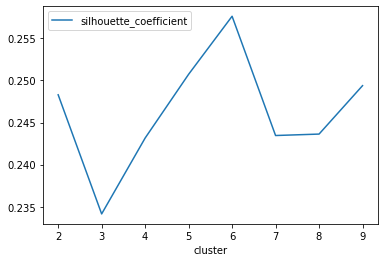

In [76]:
#plotting graph for all silhouette values for and finding for how many clusters it is the greatest
df.plot(x='cluster', y='silhouette_coefficient')

**Applying Clustering for 2 and then doing PCA for Dimensionality reduction and plotting result**

In [77]:
#as we got highest silhouette score for 6 clusters let us do clustering n_clusters = 6
k_means = KMeans(n_clusters = 6)

In [78]:
MergedData

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average
0,09/09/2019,1,47,0.209552,0.001571,0.001446,0.542614
1,06/17/2019,1,50,0.360624,0.003282,0.002872,0.698085
2,06/17/2019,1,50,0.360624,0.002948,0.002573,0.698085
3,06/17/2019,1,50,0.360624,0.001932,0.001658,0.698085
4,09/09/2019,1,50,0.360624,0.005191,0.004570,0.542614
...,...,...,...,...,...,...,...
581,06/27/2019,374,28,0.323099,0.241446,0.221436,0.201447
582,06/27/2019,374,30,0.528265,0.489938,0.443883,0.201447
583,06/04/2019,376,10,0.267057,0.000407,0.000324,0.541973
584,05/28/2019,376,20,0.280702,0.001218,0.001092,0.367420


In [79]:
label = k_means.fit_predict(MergedData.drop(['Date'], axis=1))

In [80]:
MergedData['Clusterd_label'] = label

In [81]:
pca = PCA(n_components=2)

In [82]:
df_pca = pca.fit_transform(MergedData.drop(['Date','Clusterd_label'], axis=1))
df_pca.shape

(586, 2)

In [83]:
df = pd.DataFrame(df_pca, columns=['first','second'])
df['Clusterd_label'] = label
df['Clusterd_label'] = df['Clusterd_label'].astype('category')
df

,first,second,Clusterd_label
0,-143.247890,-35.950088,2
1,-143.863681,-33.013978,2
2,-143.863681,-33.013977,2
3,-143.863682,-33.013976,2
4,-143.863663,-33.013976,2
...,...,...,...
581,225.709379,22.021172,3
582,225.299145,23.978286,3
583,231.361395,4.815326,3
584,229.308691,14.602372,3


<AxesSubplot:xlabel='first', ylabel='second'>

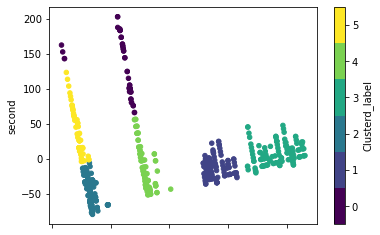

In [84]:
#graph showing clusters created for highest silhouette value
df.plot.scatter(x='first', y='second', c = 'Clusterd_label', colormap='viridis')

**Applying Decision tree classifier after clustering**

In [85]:
DT_MergedData = MergedData.drop(['Date','AADT'], axis=1)
DT_MergedData

,HIGHWAY,SECTION,SECTION LENGTH,ADT,Average,Clusterd_label
0,1,47,0.209552,0.001571,0.542614,2
1,1,50,0.360624,0.003282,0.698085,2
2,1,50,0.360624,0.002948,0.698085,2
3,1,50,0.360624,0.001932,0.698085,2
4,1,50,0.360624,0.005191,0.542614,2
...,...,...,...,...,...,...
581,374,28,0.323099,0.241446,0.201447,3
582,374,30,0.528265,0.489938,0.201447,3
583,376,10,0.267057,0.000407,0.541973,3
584,376,20,0.280702,0.001218,0.367420,3


**Applying Decision Tree classsifier for new clustured dataset**

In [86]:
X = DT_MergedData.values[:,0:5]
Y = DT_MergedData.values[:,-1]


In [87]:
X_train, X_test, y_train, y_test = train_test_split(
X,Y, test_size = 0.3, random_state = 100)

In [88]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_trainpred = clf_tree.predict(X_train)


In [90]:
print("Confusion Matrix fot raining data: \n",confusion_matrix(y_train,y_trainpred))


Confusion Matrix fot raining data: 
 [[34  0  0  0  0  0]
 [ 0 90  0  0  0  0]
 [ 0  0 86  0  0  0]
 [ 0  0  0 88  0  0]
 [ 0  0  0  0 70  0]
 [ 0  0  0  0  0 42]]


In [91]:
print ("Accuracy of training data: \n",accuracy_score(y_train,y_trainpred)*100)

Accuracy of training data: 
 100.0


In [92]:
y_pred = clf_tree.predict(X_test)


In [93]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))


Confusion Matrix: 
 [[10  0  0  0  0  0]
 [ 0 34  0  0  0  0]
 [ 0  0 36  0  0  0]
 [ 0  0  0 43  0  0]
 [ 0  0  0  0 32  0]
 [ 0  0  0  0  0 21]]


In [94]:
conmat = confusion_matrix(y_test,y_pred)

In [95]:
TP = conmat[0][0]
FN = conmat[0][1]
FP = conmat[1][0]
TN = conmat[1][1]

In [96]:
Accuracy = (TP + TN)/(TP+FN+FP+TN)
Accuracy

1.0

In [97]:
Precision = TP/(TP+FP)
Precision


1.0

In [98]:
 Recall = TP/(TP+FN)
Recall

1.0

In [99]:
F1_measure = (2*(Recall)*(Precision))/(Recall+Precision)
F1_measure

1.0

In [100]:
print ("Accuracy of testdata: \n",accuracy_score(y_test,y_pred)*100)


Accuracy of testdata: 
 100.0


In [101]:
print("Report : \n",classification_report(y_test, y_pred))


Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        34
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00        43
         4.0       1.00      1.00      1.00        32
         5.0       1.00      1.00      1.00        21

    accuracy                           1.00       176
   macro avg       1.00      1.00      1.00       176
weighted avg       1.00      1.00      1.00       176



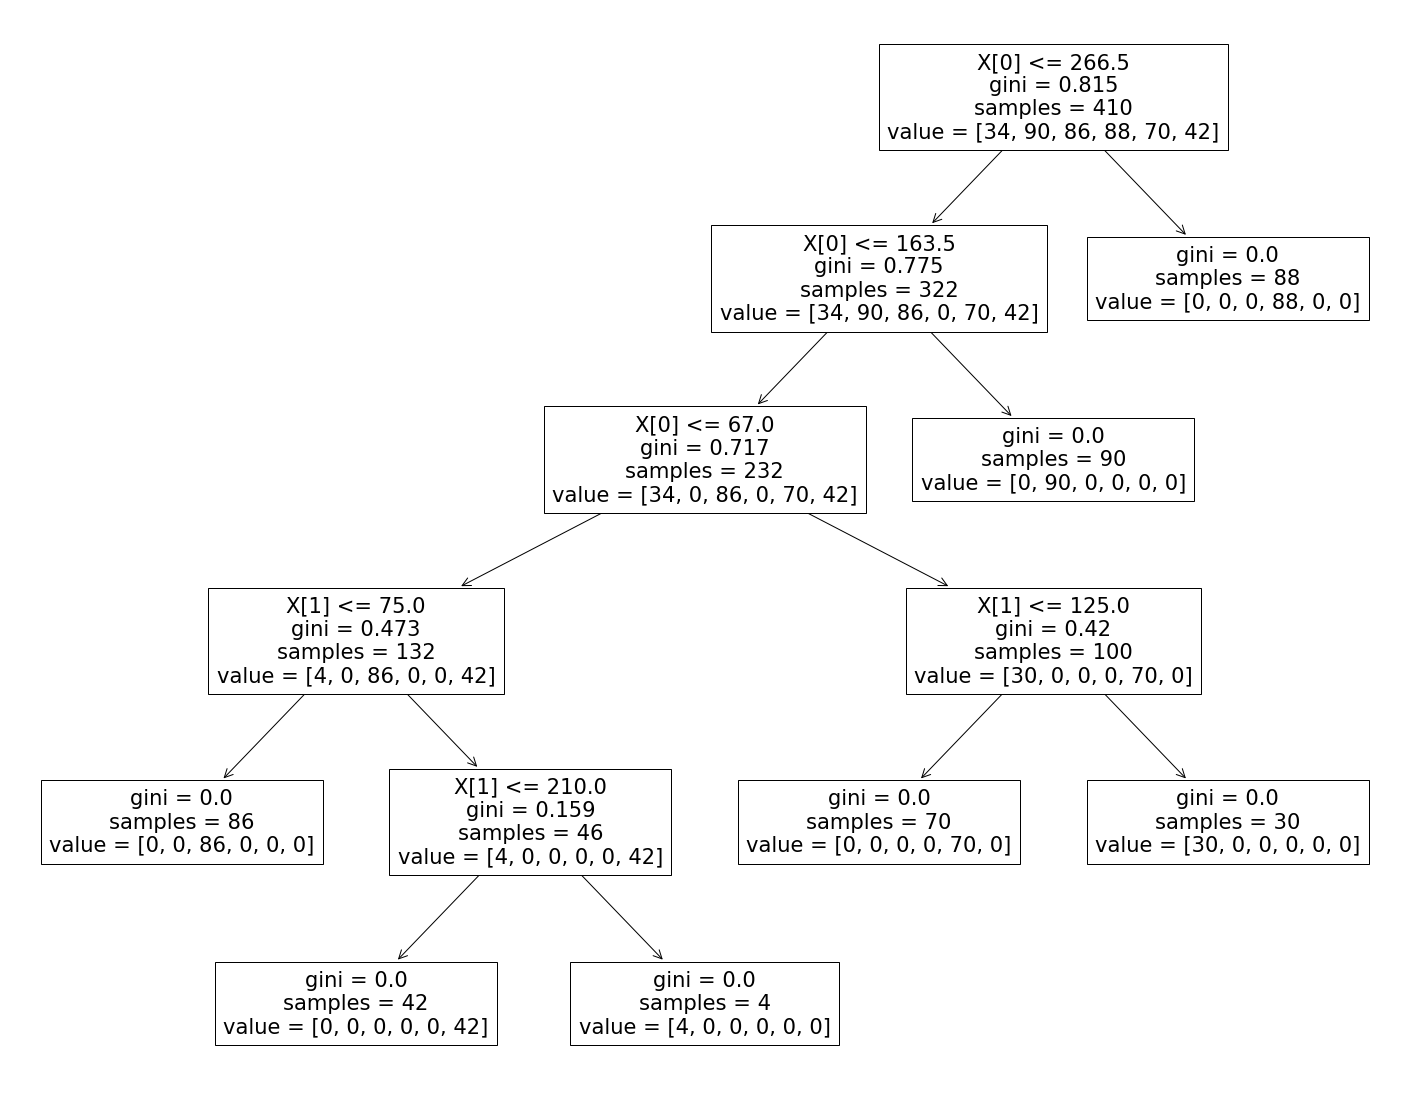

In [102]:
from sklearn import tree
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf_tree)
fig.savefig("decistion_tree.png")

**Applying Navie Bayes after clustering**

In [103]:
X = DT_MergedData.values[:,0:5]
Y = DT_MergedData.values[:,-1]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
X,Y, test_size = 0.3, random_state = 100)

In [105]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Mayank\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [106]:
NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB()

In [107]:
y_trainpred = NBclassifier.predict(X_train)

In [108]:
print("Confusion Matrix for training data: \n",confusion_matrix(y_train,y_trainpred))


Confusion Matrix for training data: 
 [[31  0  0  0  1  2]
 [ 0 90  0  0  0  0]
 [ 0  0 83  0  0  3]
 [ 0  0  0 88  0  0]
 [ 1  0  0  0 69  0]
 [ 0  0  3  0  0 39]]


In [109]:
print ("Accuracy of training data: \n",accuracy_score(y_train,y_trainpred)*100)

Accuracy of training data: 
 97.5609756097561


In [110]:
y_pred = NBclassifier.predict(X_test)

In [111]:
print ("Accuracy of testdata: \n",accuracy_score(y_test,y_pred)*100)


Accuracy of testdata: 
 98.29545454545455


In [112]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))


Confusion Matrix: 
 [[ 9  0  0  0  1  0]
 [ 0 34  0  0  0  0]
 [ 0  0 35  0  0  1]
 [ 0  0  0 43  0  0]
 [ 1  0  0  0 31  0]
 [ 0  0  0  0  0 21]]


**Statistical test for best hypothesis**

**Performing 10X10-Fold cross validation and student t-test on accuaracy obtained from cross validations**

In [113]:
NBAccuracy_List = []
DTAccuracy_List = []
#length of datapoints for training
n1_train = []
#length of datapoints for testing
n2_test = []
kf = KFold(n_splits=10)
for i in range(10):
    for train_index, test_index in kf.split(X):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = Y[train_index], Y[test_index]
    
        n1_train.append(len(ytrain))
        n2_test.append(len(ytest))
        
        clf_tree.fit(Xtrain, ytrain)
        NBclassifier.fit(Xtrain, ytrain)
    
        ypredDT = clf_tree.predict(Xtest)
        ypredNB = NBclassifier.predict(Xtest)
    
        DTAccuracy = accuracy_score(ytest, ypredDT)
        NBAccuracy = accuracy_score(ytest, ypredNB)
        DTAccuracy_List.append(DTAccuracy)
        NBAccuracy_List .append(NBAccuracy)


In [114]:
Differences_list = [y -x for y, x in zip(DTAccuracy_List,NBAccuracy_List)]


In [115]:
#mean of differences
d_bar = np.mean(Differences_list)
d_bar

0.06708357685563995

In [116]:
#variance of differences
sigma2 = np.var(Differences_list, ddof=1)
sigma2

0.031042436742399274

In [117]:
#no of datapoints used for training
n1 = np.median(n1_train)
n1

527.0

In [118]:
#no of datapoints used for testing
n2 = np.median(n2_test)
n2

59.0

In [119]:
#compute Total number of datapoints
n = 10 * 10
n

100

In [120]:
#computing modified variance
sigma2_mod = sigma2*(1/n + n2/n1)
sigma2_mod

0.0037857635852637595

In [121]:
#computing t-static
t_static = d_bar / np.sqrt(sigma2_mod)
t_static

1.0902835664262074

In [122]:
#computing p-value
Pvalue = ((1 - t.cdf(np.abs(t_static),n-1))*2)
Pvalue

0.2782348766691636